Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.tree import DecisionTreeClassifier
# Evaluate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

## Data Understanding

### Collecting Data

In [2]:
DM2019_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/DM2019_kepesertaan.dta')
DM2019_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF,NaN
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF,NaN
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF,NaN
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL,2019.0
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF,NaN


In [3]:
DM2020_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/DM2020_kepesertaan.dta')
DM2020_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2020,AKTIF,NaN
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2020,AKTIF,NaN
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2020,AKTIF,NaN
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2020,AKTIF,NaN
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2020,AKTIF,NaN


In [4]:
DM2021_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/DM2021_kepesertaan.dta')
DM2021_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,66897393,66897393,1955-12-31,PESERTA,LAKI-LAKI,CERAI,KELAS II,PPU,ACEH,PIDIE,SWASTA,KLINIK PRATAMA,ACEH,PIDIE,11.318326,2021,AKTIF,NaN
1,36947751,36947751,1957-01-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA BANDA ACEH,SWASTA,DOKTER UMUM,ACEH,KOTA BANDA ACEH,1.850896,2021,AKTIF,NaN
2,58468881,58468881,1959-06-15,PESERTA,PEREMPUAN,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,KOTA LANGSA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LANGSA,7.597364,2021,AKTIF,NaN
3,67318251,67318251,1977-11-11,PESERTA,LAKI-LAKI,KAWIN,KELAS II,PPU,ACEH,KOTA LHOKSEUMAWE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA LHOKSEUMAWE,6.003162,2021,AKTIF,NaN
4,80155656,80155656,1961-12-31,PESERTA,PEREMPUAN,CERAI,KELAS I,PPU,ACEH,BIREUEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,BIREUEN,11.383931,2021,AKTIF,NaN


In [5]:
TB2019_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/TB2019_kepesertaan.dta')
TB2019_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,21611150,21611150,1957-09-12,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,ACEH BESAR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BESAR,1.157796,2019,AKTIF,NaN
1,94343049,96772919,1961-12-03,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.556821,2019,AKTIF,NaN
2,83393824,298548714,2002-10-05,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.159913,2019,AKTIF,NaN
3,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,9.436164,2019,AKTIF,NaN
4,67805935,67805935,1972-11-13,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,0.899331,2019,AKTIF,NaN


In [6]:
TB2020_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/TB2020_kepesertaan.dta')
TB2020_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2020,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2020,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2020,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2020,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2020,AKTIF,NaN


In [7]:
TB2021_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/TB2021_kepesertaan.dta')
TB2021_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2021,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2021,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2021,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2021,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2021,AKTIF,NaN


In [8]:
reguler_kepesertaan=pd.read_stata ('/content/drive/MyDrive/DATA SET/2015202101_kepesertaan.dta')
reguler_kepesertaan.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,135798314,6326929,1997-03-01,ANAK,LAKI-LAKI,TIDAK TERDEFINISI,KELAS III,PBI APBN,JAWA TENGAH,TEMANGGUNG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,TEMANGGUNG,79.944771,2016,TIDAK AKTIF,NaN
1,135821984,135821984,1956-08-01,PESERTA,LAKI-LAKI,TIDAK TERDEFINISI,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,76.267944,2016,TIDAK AKTIF,NaN
2,47640415,97101523,1993-10-01,ANAK,PEREMPUAN,CERAI,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,227.123001,2016,AKTIF,NaN
3,95736990,43313628,1965-09-01,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,KENDAL,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,KENDAL,41.915855,2016,AKTIF,NaN
4,66860922,70450667,2010-06-24,TAMBAHAN,LAKI-LAKI,BELUM KAWIN,KELAS III,PBI APBN,JAWA TENGAH,TEMANGGUNG,SWASTA,DOKTER UMUM,JAWA TENGAH,TEMANGGUNG,21.220556,2016,AKTIF,NaN


Merge Dataset (Data Integration)

In [9]:
df = [DM2019_kepesertaan,DM2020_kepesertaan,DM2021_kepesertaan,TB2019_kepesertaan,TB2020_kepesertaan,TB2021_kepesertaan,reguler_kepesertaan]
merge_ori = pd.concat(df)

In [10]:
merge_df = merge_ori.copy()

In [11]:
print(merge_df.shape)
merge_df.head()

(3020821, 18)


,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF,NaN
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF,NaN
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF,NaN
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL,2019.0
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF,NaN


### Describe Data

In [12]:
merge_df.describe()

,PSTV01,PSTV02,PSTV15,PSTV16,PSTV18
count,3.020821e+06,3.020821e+06,3.020821e+06,3.020821e+06,111067.000000
mean,1.434884e+08,1.424649e+08,8.893610e+01,2.017568e+03,2019.016179
std,1.203137e+08,1.213148e+08,2.353842e+02,1.961516e+00,1.669029
min,1.500000e+01,1.500000e+01,1.568037e-01,2.016000e+03,2014.000000
25%,5.104401e+07,4.962626e+07,8.332311e+00,2.016000e+03,2019.000000
50%,1.033770e+08,9.925007e+07,2.283859e+01,2.016000e+03,2019.000000
75%,1.990410e+08,1.985788e+08,8.855906e+01,2.020000e+03,2020.000000
max,4.605590e+08,4.605590e+08,5.386168e+04,2.021000e+03,2021.000000


### Validation Data

In [13]:
print(merge_df.shape)
merge_df.info()

(3020821, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020821 entries, 0 to 2305434
Data columns (total 18 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PSTV01  int32         
 1   PSTV02  int32         
 2   PSTV03  datetime64[ns]
 3   PSTV04  category      
 4   PSTV05  category      
 5   PSTV06  object        
 6   PSTV07  object        
 7   PSTV08  object        
 8   PSTV09  category      
 9   PSTV10  object        
 10  PSTV11  object        
 11  PSTV12  object        
 12  PSTV13  object        
 13  PSTV14  object        
 14  PSTV15  float32       
 15  PSTV16  int16         
 16  PSTV17  object        
 17  PSTV18  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(1), int16(1), int32(2), object(9)
memory usage: 325.5+ MB


## Data Preparation

### Data Cleaning

In [14]:
# checking missing value
merge_df.isna().sum()

PSTV01          0
PSTV02          0
PSTV03          0
PSTV04          0
PSTV05          0
PSTV06          0
PSTV07          0
PSTV08          0
PSTV09          0
PSTV10          0
PSTV11          0
PSTV12          0
PSTV13          0
PSTV14          0
PSTV15          0
PSTV16          0
PSTV17          0
PSTV18    2909754
dtype: int64

Berdasarkan output missing value diatas, kolom `PSTV18` memiliki nilai yang cenderung kosong. Maka akan dilakukan drop terhadap kolom sebagai solusinya

In [15]:
merge_df.drop(['PSTV18'], inplace=True, axis = 1)
merge_df

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,290698984,290698984,1965-05-14,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,JAWA BARAT,KOTA TASIKMALAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,KOTA TASIKMALAYA,3312.561035,2019,AKTIF
2305431,402778434,391518127,2013-03-17,ANAK,PEREMPUAN,BELUM KAWIN,KELAS II,PPU,JAWA TIMUR,JEMBER,SWASTA,DOKTER UMUM,JAWA TIMUR,SAMPANG,54.075462,2019,AKTIF
2305432,372419310,372419310,1958-02-10,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA BARAT,BANDUNG BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,BANDUNG BARAT,60.153950,2019,AKTIF
2305433,341838920,341838920,1992-03-26,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,SRAGEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,SRAGEN,465.500214,2019,AKTIF


In [16]:
merge_df.dropna()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,45243428,1959-10-11,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,PIDIE,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,PIDIE,11.468968,2020,AKTIF
1,356470819,356470819,1965-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,KOTA BANDA ACEH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,KOTA BANDA ACEH,9.863322,2020,AKTIF
2,72280409,375793382,1964-08-03,ISTRI,PEREMPUAN,CERAI,KELAS I,BUKAN PEKERJA,SUMATERA UTARA,BATU BARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,BATU BARA,8.487743,2020,AKTIF
3,88501975,88501975,1959-10-02,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,SUMATERA UTARA,ASAHAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,ASAHAN,10.726228,2020,MENINGGAL
4,94870095,310527655,1947-01-01,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,SUMATERA BARAT,PESISIR SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA BARAT,PESISIR SELATAN,10.539836,2020,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,290698984,290698984,1965-05-14,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,JAWA BARAT,KOTA TASIKMALAYA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,KOTA TASIKMALAYA,3312.561035,2019,AKTIF
2305431,402778434,391518127,2013-03-17,ANAK,PEREMPUAN,BELUM KAWIN,KELAS II,PPU,JAWA TIMUR,JEMBER,SWASTA,DOKTER UMUM,JAWA TIMUR,SAMPANG,54.075462,2019,AKTIF
2305432,372419310,372419310,1958-02-10,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA BARAT,BANDUNG BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,BANDUNG BARAT,60.153950,2019,AKTIF
2305433,341838920,341838920,1992-03-26,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBN,JAWA TENGAH,SRAGEN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,SRAGEN,465.500214,2019,AKTIF


In [17]:
# checking duplicate value
merge_df.duplicated().sum()

113117

In [18]:
merge_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", merge_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
print(merge_df.shape)
merge_df.info()

(2907704, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907704 entries, 0 to 2305434
Data columns (total 17 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PSTV01  int32         
 1   PSTV02  int32         
 2   PSTV03  datetime64[ns]
 3   PSTV04  category      
 4   PSTV05  category      
 5   PSTV06  object        
 6   PSTV07  object        
 7   PSTV08  object        
 8   PSTV09  category      
 9   PSTV10  object        
 10  PSTV11  object        
 11  PSTV12  object        
 12  PSTV13  object        
 13  PSTV14  object        
 14  PSTV15  float32       
 15  PSTV16  int16         
 16  PSTV17  object        
dtypes: category(3), datetime64[ns](1), float32(1), int16(1), int32(2), object(9)
memory usage: 291.2+ MB


### Data Transformation

In [21]:
def label_encode_columns(dataframe, columns):
    le = LabelEncoder()
    for column in columns:
        # Check if the column contains any non-numeric values
        if not pd.api.types.is_numeric_dtype(dataframe[column]):
            # If not numeric, convert the column to string before applying LabelEncoder
            dataframe[column] = dataframe[column].astype(str)

        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

# Example usage
columns_to_encode = ['PSTV02','PSTV04', 'PSTV05', 'PSTV06', 'PSTV07', 'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11',
                     'PSTV12', 'PSTV13', 'PSTV14', 'PSTV15', 'PSTV16']

merge_encode = label_encode_columns(merge_df, columns_to_encode)

In [22]:
merge_encode.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,45243428,244485,1959-10-11,2,1,2,1,6,0,402,2,3,0,402,72364,4,AKTIF
1,356470819,985323,1965-12-31,2,0,2,1,6,0,171,2,3,0,171,58346,4,AKTIF
2,72280409,1009059,1964-08-03,1,1,1,1,1,33,42,2,3,33,42,48412,4,AKTIF
3,88501975,478252,1959-10-02,2,1,2,1,6,33,13,2,3,33,13,65483,4,MENINGGAL
4,94870095,928532,1947-01-01,3,0,2,1,1,31,401,2,3,31,401,63809,4,AKTIF


### Data Selection (Feature Selection)

<ipython-input-23-4c9aa7bae83b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_encode.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')


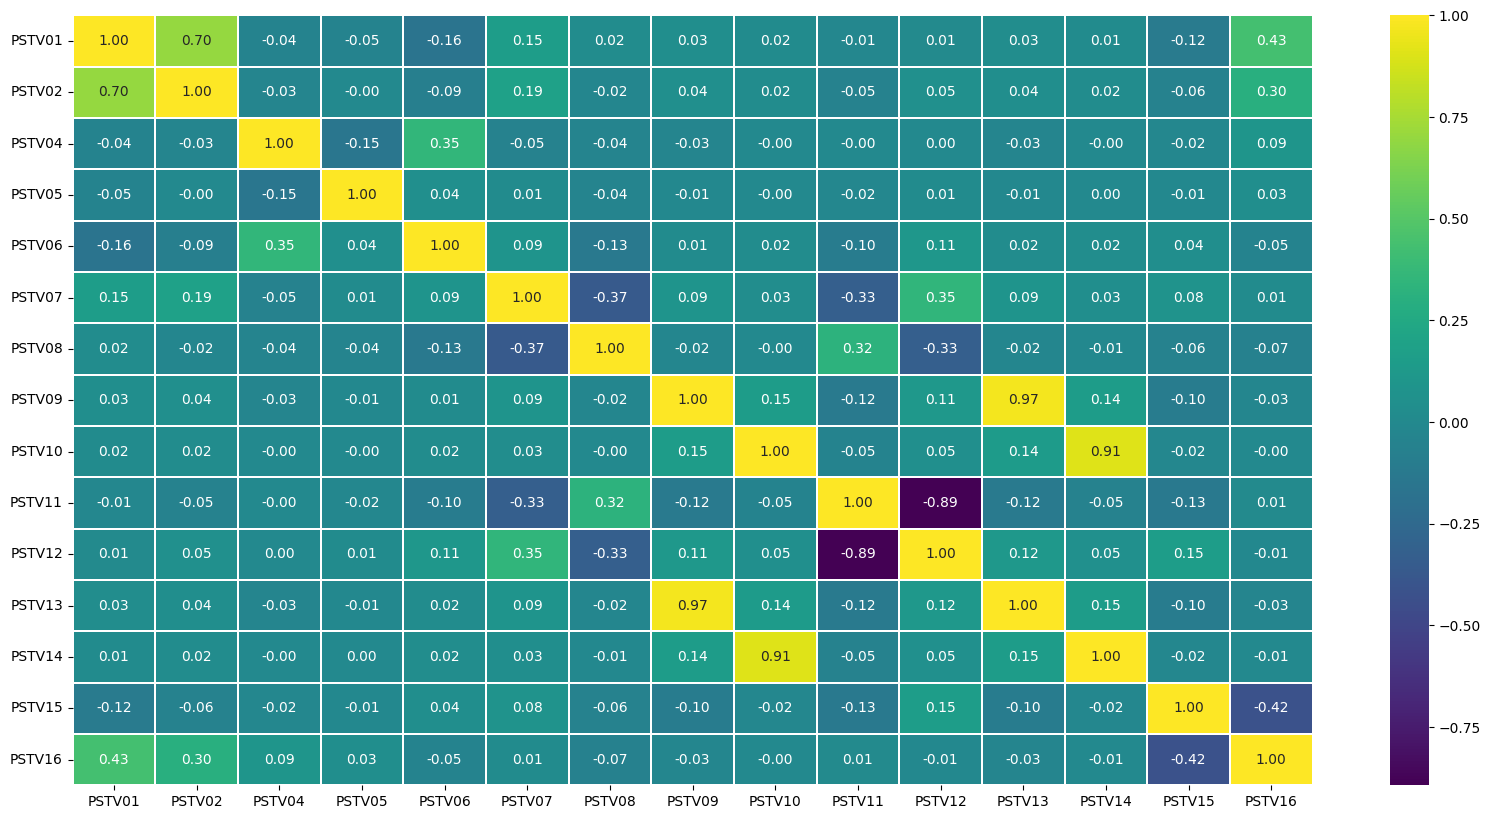

In [23]:
# Matrix Correlation with Heatmap
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(merge_encode.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.show()

In [24]:
merge_encode.columns

Index(['PSTV01', 'PSTV02', 'PSTV03', 'PSTV04', 'PSTV05', 'PSTV06', 'PSTV07',
       'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11', 'PSTV12', 'PSTV13', 'PSTV14',
       'PSTV15', 'PSTV16', 'PSTV17'],
      dtype='object')

In [25]:
to_drop = ['PSTV01','PSTV03']
merge_encode.drop(to_drop, inplace=True, axis = 1)
merge_encode

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,4,AKTIF
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,4,AKTIF
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,4,AKTIF
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,4,MENINGGAL
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,4,AKTIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,904168,2,0,2,3,4,8,260,2,3,8,260,211530,3,AKTIF
2305431,1028209,0,1,0,2,6,10,127,5,0,10,428,117447,3,AKTIF
2305432,1004884,2,1,2,3,4,8,18,2,3,8,18,119617,3,AKTIF
2305433,967284,2,1,2,3,4,9,458,2,3,9,458,182818,3,AKTIF


Alasan dilakukan drop karena `PSTV01`merupakan index dari pendataan kepesertaan, sementara `PSTV03`merupakan tanggal lahir dari peserta, sehingga kurang relevan apabila digunakan sebagai input dalam model

### Data Labelling

In [26]:
merge_encode['PSTV17'].value_counts()

AKTIF          1948858
TIDAK AKTIF     856018
MENINGGAL       102735
99                  92
30                   1
Name: PSTV17, dtype: int64

In [27]:
merge_encode['PSTV17'] = merge_encode['PSTV17'].map({'AKTIF': 1, 'TIDAK AKTIF': 0, 'MENINGGAL': 0, '99': 0, '30': 0})

In [28]:
merge_encode['PSTV17'].value_counts()

1.0    1948858
0.0     958753
Name: PSTV17, dtype: int64

In [29]:
merge_encode.head()

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,4,1.0
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,4,1.0
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,4,1.0
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,4,0.0
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,4,1.0


In [30]:
merge_encode.isna().sum()

PSTV02     0
PSTV04     0
PSTV05     0
PSTV06     0
PSTV07     0
PSTV08     0
PSTV09     0
PSTV10     0
PSTV11     0
PSTV12     0
PSTV13     0
PSTV14     0
PSTV15     0
PSTV16     0
PSTV17    93
dtype: int64

In [31]:
clean_df = merge_encode.dropna()
clean_df.head()

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,4,1.0
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,4,1.0
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,4,1.0
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,4,0.0
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,4,1.0


In [32]:
clean_df.isna().sum()

PSTV02    0
PSTV04    0
PSTV05    0
PSTV06    0
PSTV07    0
PSTV08    0
PSTV09    0
PSTV10    0
PSTV11    0
PSTV12    0
PSTV13    0
PSTV14    0
PSTV15    0
PSTV16    0
PSTV17    0
dtype: int64

## Build Test Scenario

In [33]:
X = clean_df.drop('PSTV17', axis = 1)
y = clean_df['PSTV17']

In [34]:
X

,PSTV02,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16
0,244485,2,1,2,1,6,0,402,2,3,0,402,72364,4
1,985323,2,0,2,1,6,0,171,2,3,0,171,58346,4
2,1009059,1,1,1,1,1,33,42,2,3,33,42,48412,4
3,478252,2,1,2,1,6,33,13,2,3,33,13,65483,4
4,928532,3,0,2,1,1,31,401,2,3,31,401,63809,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305430,904168,2,0,2,3,4,8,260,2,3,8,260,211530,3
2305431,1028209,0,1,0,2,6,10,127,5,0,10,428,117447,3
2305432,1004884,2,1,2,3,4,8,18,2,3,8,18,119617,3
2305433,967284,2,1,2,3,4,9,458,2,3,9,458,182818,3


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((2326088, 14), (581523, 14))

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

### Evaluation

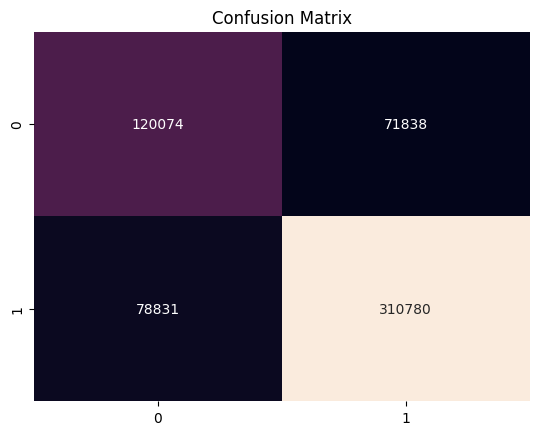

In [37]:
y_pred_dc = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, y_pred_dc)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(classification_report(y_test, y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61    191912
         1.0       0.81      0.80      0.80    389611

    accuracy                           0.74    581523
   macro avg       0.71      0.71      0.71    581523
weighted avg       0.74      0.74      0.74    581523

precision_score: 0.8122461567411884
accuracy_score: 0.7409062066332716
recall_score: 0.7976674169877134


In [39]:
# Prediksi Data Baru
# PSTV01 = int(input('Masukkan PSTV01     : '))
# PSTV02 = int(input('Masukkan PSTV02             : '))
# PSTV03 = input('Masukkan PSTV03      : ')
# PSTV04 = input('Masukkan PSTV04      : ')
# PSTV05 = input('Masukkan PSTV05      : ')
# PSTV06 = input('Masukkan PSTV06      : ')
# PSTV07 = input('Masukkan PSTV07      : ')
# PSTV08 = input('Masukkan PSTV08      : ')
# PSTV09 = input('Masukkan PSTV09      : ')
# PSTV10 = input('Masukkan PSTV10      : ')
# PSTV11 = input('Masukkan PSTV11      : ')
# PSTV12 = input('Masukkan PSTV12      : ')
# PSTV13 = input('Masukkan PSTV13      : ')
# PSTV14 = input('Masukkan PSTV14      : ')
# PSTV15 = int(input('Masukkan PSTV15             : '))
# PSTV16 = int(input('Masukkan PSTV16             : '))
# PSTV17 = input('Masukkan PSTV17      : ')

PSTV02 = 45243428;
PSTV04 = 'PESERTA';
PSTV05 = 'PEREMPUAN';
PSTV06 = 'KAWIN';
PSTV07 = 'KELAS I';
PSTV08 = 'PPU';
PSTV09 = 'ACEH';
PSTV10 = 'PIDIE';
PSTV11 = 'PEMERINTAH KABUPATEN/KOTA';
PSTV12 = 'PUSKESMAS';
PSTV13 = 'ACEH';
PSTV14 = 'PIDIE';
PSTV15 = 11.468968;
PSTV16 = 2020;

# Create a new dataframe with the input data
new_data = pd.DataFrame([[PSTV02, PSTV04, PSTV05, PSTV06, PSTV07,
                          PSTV08, PSTV09, PSTV10, PSTV11, PSTV12, PSTV13, PSTV14,
                          PSTV15, PSTV16]],
                        columns=X.columns)

# Apply label encoding to the new data using the same label encoder
new_data_encoded = label_encode_columns(new_data, columns_to_encode)

In [40]:
# Assuming you have a trained decision tree classifier named dtc
if dtc.predict(new_data_encoded) == 1:
    print('Aktif')
else:
    print('Tidak Aktif')

Aktif


In [41]:
# # save the model to disk
# import nltk
# import pickle
# filename = '/content/drive/MyDrive/DATA SET/modeldtc.sav'
# pickle.dump(dtc, open(filename, 'wb'))

In [42]:
merge_ori['PSTV02'].value_counts()

138283437    585
147857887    263
142801335    260
142775230    244
159275888    174
            ... 
398622880      1
52855724       1
85883529       1
29910136       1
341838920      1
Name: PSTV02, Length: 1113292, dtype: int64

In [43]:
merge_ori['PSTV04'].value_counts()

PESERTA     1298658
ANAK         929549
ISTRI        602439
TAMBAHAN     119058
SUAMI         71117
Name: PSTV04, dtype: int64

In [44]:
merge_ori['PSTV05'].value_counts()

PEREMPUAN    1517510
LAKI-LAKI    1503311
Name: PSTV05, dtype: int64

In [45]:
merge_ori['PSTV06'].value_counts()

KAWIN                1577414
BELUM KAWIN          1061307
TIDAK TERDEFINISI     266066
CERAI                 116034
Name: PSTV06, dtype: int64

In [46]:
merge_ori['PSTV07'].value_counts()

KELAS III    1655021
KELAS II      694424
KELAS I       670890
MISSING          455
9                 31
Name: PSTV07, dtype: int64

In [47]:
merge_ori['PSTV08'].value_counts()

PPU              990230
PBI APBN         836148
PBPU             683443
PBI APBD         331694
BUKAN PEKERJA    179253
MISSING              47
9                     6
Name: PSTV08, dtype: int64

In [48]:
merge_ori['PSTV09'].value_counts()

JAWA TENGAH                   375053
JAWA BARAT                    368567
JAWA TIMUR                    350288
SUMATERA UTARA                185520
SULAWESI SELATAN              123038
SUMATERA SELATAN              104609
DKI JAKARTA                   100369
LAMPUNG                        87308
BANTEN                         85377
NUSA TENGGARA TIMUR            84640
ACEH                           82230
RIAU                           80078
PAPUA                          78406
SUMATERA BARAT                 74072
BALI                           64258
KALIMANTAN SELATAN             63213
SULAWESI TENGGARA              58839
KALIMANTAN BARAT               58706
KALIMANTAN TIMUR               57347
SULAWESI UTARA                 52000
JAMBI                          50552
DAERAH ISTIMEWA YOGYAKARTA     47487
SULAWESI TENGAH                46920
NUSA TENGGARA BARAT            46017
KALIMANTAN TENGAH              44836
BENGKULU                       42263
MALUKU                         38072
P

In [49]:
merge_ori['PSTV10'].value_counts()

BOGOR                 35676
KOTA SURABAYA         35358
KOTA JAKARTA TIMUR    31086
KOTA SEMARANG         30542
BANDUNG               28118
                      ...  
PUNCAK                  854
INTAN JAYA              809
MAMBERAMO RAYA          799
MANOKWARI SELATAN       729
MAMBERAMO TENGAH        448
Name: PSTV10, Length: 515, dtype: int64

In [50]:
merge_ori['PSTV11'].value_counts()

PEMERINTAH KABUPATEN/KOTA    1833125
SWASTA                       1015148
POLRI                          51412
TNI AD                         46384
BUMN                           35963
PEMERINTAH PROVINSI            17602
TNI AL                         10962
TNI AU                          7904
MISSING                         1840
VERTIKAL/PUSAT                   481
Name: PSTV11, dtype: int64

In [51]:
merge_ori['PSTV12'].value_counts()

PUSKESMAS         1846289
KLINIK PRATAMA     738942
DOKTER UMUM        434168
MISSING              1422
Name: PSTV12, dtype: int64

In [52]:
merge_ori['PSTV13'].value_counts()

JAWA BARAT                    370476
JAWA TENGAH                   368019
JAWA TIMUR                    349704
SUMATERA UTARA                182325
SULAWESI SELATAN              122362
SUMATERA SELATAN              105426
DKI JAKARTA                    98100
BANTEN                         88618
LAMPUNG                        85077
NUSA TENGGARA TIMUR            83545
ACEH                           81181
RIAU                           80388
PAPUA                          78652
SUMATERA BARAT                 74512
BALI                           67207
KALIMANTAN SELATAN             64672
KALIMANTAN TIMUR               60919
KALIMANTAN BARAT               59415
SULAWESI TENGGARA              58992
SULAWESI UTARA                 52244
JAMBI                          50004
DAERAH ISTIMEWA YOGYAKARTA     48942
SULAWESI TENGAH                46398
KALIMANTAN TENGAH              46130
NUSA TENGGARA BARAT            45404
BENGKULU                       42573
MALUKU                         37730
P

In [53]:
merge_ori['PSTV14'].value_counts()

KOTA SURABAYA         34983
BOGOR                 33708
KOTA SEMARANG         31150
KOTA JAKARTA TIMUR    30200
KOTA BANDUNG          24413
                      ...  
YALIMO                  852
PUNCAK                  827
INTAN JAYA              786
MANOKWARI SELATAN       780
MAMBERAMO TENGAH        450
Name: PSTV14, Length: 515, dtype: int64

In [54]:
merge_ori['PSTV15'].value_counts()

1.050523      43206
1.155575       5966
1.260627       5595
1.575784       5192
1.470732       4771
              ...  
343.667938        1
804.437012        1
356.709229        1
870.175232        1
137.629379        1
Name: PSTV15, Length: 213044, dtype: int64

In [55]:
merge_ori['PSTV16'].value_counts()

2016    1697452
2020     489762
2021     342937
2019     216378
2018     139326
2017     134966
Name: PSTV16, dtype: int64